<h1> Pre-Processing 1 </h1>

Currently, there are 38907 reports in the raw data. 

In [ ]:
#imports
import pandas as pd

df = pd.read_csv("raw_data_of_all_reports.csv")

<h3> Exclusion of reports </h3>


Some reports were included for the following reasons: 
- They redirected to other web domains, thus could not be scraped (n=70)
- Reports were not available for viewing (n=1)
- Multiple substances were consumed or individuals were sold the wrong substance (n=11,452) 

In [ ]:
exception_list = ["1,4-Butanediol", "1,4 Butanediol", "2006 LSD Symposium, Basel", "Morning Glory (Heavenly Blue, extract)"]

for substance in df.substance:
    if substance not in exception_list:
        #typical string when multiple or the wrong substances were consumed
        if "&" in substance or "and" in substance or "," in substance or "/" in substance or "mistaken" in substance or "sold" in substance:
            index = df[df.substance == substance].index
            df.drop(index, axis = 0, inplace = True)


index = df[df.url == "https://erowid.org/experiences/exp.php?ID=38705"].index
df.drop(index, axis = 0, inplace = True)


<h3> Categorizing substances and classes </h3>

The substances categorization scheme by Sanz et al. (2018) and Martiala et al (2019) was used. See the supplementary information of Martiala et al. (2019) for this. This scheme includes: 

- 9 classes: Serotonergic psychedelics, Dissociative psychedelics, Entactogens, Deliriants, Depressant / sedatives, Stimulants, Oneirogens, Antidepressants / antipsychotics, Other

- 161 substances (divided across those classes): see document "substances_classes.csv"



<h6> References</h6> 


<h6> Sanz, C., Zamberlan, F., Erowid, E., Erowid, F., & Tagliazucchi, E. (2018). The Experience Elicited by Hallucinogens Presents the Highest Similarity to Dreaming within a Large Database of Psychoactive Substance Reports. Frontiers in Neuroscience, 12. https://www.frontiersin.org/articles/10.3389/fnins.2018.00007</h6> 


<h6> Martial, C., Cassol, H., Charland-Verville, V., Pallavicini, C., Sanz, C., Zamberlan, F., Vivot, R. M., Erowid, F., Erowid, E., Laureys, S., Greyson, B., & Tagliazucchi, E. (2019). Neurochemical models of near-death experiences: A large-scale study based on the semantic similarity of written reports. Consciousness and Cognition, 69, 52–69. https://doi.org/10.1016/j.concog.2019.01.011 </h6> 

<br>

<h3> Type of consumption </h3>

Substances can be consumed in a number of ways, i.e. smoking, edibles, tea. Text containing this information was removed as to better classify substances automatically.

In [ ]:

df.substance = df.substance.str.lower()

remove_words = [" oral"," (oral)",
                " edible"," (edible)",
                " oil"," (oil)",
                " smoked"," (smoked)",
                " tea"," (tea)",
                " seed"," (seed)",
                " seeds"," (seeds)",
                " leaf"," (leaf)",
                " leaves"," (leaves)",
                " powder"," (powder)",
                " freebase"," (freebase)", " - freebase",
                " blotter", " (blotter)",
                " incense", " (incense)",
                " xr", " (xr)",
                " (extract)", " (cold water extract)"," (4x extract)"," (5x extract)"," (6x extract)"," (7x extract)"," (10x extract)"," (13x extract)",
                " (15x extract)"," (20x extract)"," (21x extract)"," (24x extract)"," (25x extract)"," (30x extract)"," ('30x extract')",
                " (32x extract)"," (35x extract)"," (40x extract)"," (45x extract)"," (80x extract)"," ('80x extract')",
                " heavenly blue"," (heavenly blue)"," (heavenly blue, extract)",
                " (xanax)"," - adderall"," (adderall)"," (adderall xr)"
                    ]

for item in remove_words:
    df.substance = df.substance.str.replace(item,  '', regex=False)

<h3> Proper vs trade (slang) names </h3>

Since authors on Erowid used both proper and slang names (with various spellings) for substances, a name dictionary was created to match slang names to the substance names used in the Martiala et al. (2019) classification. This dictionary was created semi-automatically and may not capture all the slang names, therefore some reports might have been excluded (next step), despite a substance from the Martiala et al .(2019) classification being used

In [ ]:

name_dict = { 
            "lsd":["2006 lsd symposium, basel", " lsd"],
            "psilocybin mushrooms":["psilocybin", "mushroom", "mushrooms", "mushroom - p. cubensis", "magic mushrooms", "magic mushrooms (sclerotia)", "'mushrooms'", "mushrooms  - p. cubensis", "mushrooms - c. cyanescens", "mushrooms - p cubensis", "mushrooms - p. arcana", "mushrooms - p. atlantis (sclerotia)", 'mushrooms - p. azurescens', 'mushrooms - p. azurescens?', 'mushrooms - p. baeocystis', 'mushrooms - p. cubenesis', 'mushrooms - p. cubenesis (amazonian strain)', 'mushrooms - p. cubensis', 'mushrooms - p. cubensis (albino penis envy)', 'mushrooms - p. cubensis (amazon strain)', 'mushrooms - p. cubensis (cambodian)', "mushrooms - p. cubensis ('cambodian')", 'mushrooms - p. cubensis (dried)', 'mushrooms - p. cubensis (ecuadorean)', 'mushrooms - p. cubensis (extract)', 'mushrooms - p. cubensis (fresh)', 'mushrooms - p. cubensis (golden teacher)', 'mushrooms - p. cubensis (golden teachers)', 'mushrooms - p. cubensis (in chocolate)', 'mushrooms - p. cubensis (mexican)', 'mushrooms - p. cubensis (mycelium)', 'mushrooms - p. cubensis (penis envy)', 'mushrooms - p. cubensis (pes amazonia)', 'mushrooms - p. cubensis (sclerotia)', 'mushrooms - p. cubensis (smoked)', 'mushrooms - p. cubensis (tasmanian strain)', 'mushrooms - p. cyanescens', 'mushrooms - p. cyanescens (smoked)', 'mushrooms - p. galindoi', 'mushrooms - p. mexicana', 'mushrooms - p. mexicana (fresh)', 'mushrooms - p. mexicana (sclerotia)', 'mushrooms - p. mexicana (truffles)', 'mushrooms - p. ovoideocystidiata', 'mushrooms - p. semilanceata', 'mushrooms - p. subaeruginosa', 'mushrooms - p. subbalteatus or p. papilionaceus', 'mushrooms - p. tampanensis', 'mushrooms - p. tampanensis (sclerotia)', 'mushrooms - p. tampanensis (truffles)', 'mushrooms - p. weilii', 'mushrooms - p. zapotecorum', 'mushrooms - panaeolus cyanescens', 'mushrooms - panaeolus subbalteatus', 'mushrooms - psilocybe cyanescens', 'mushrooms (blue vein)', 'mushrooms (dried)', 'mushrooms (edible)', 'mushrooms (extract)', 'mushrooms (fresh)', "mushrooms ('gold caps')", 'mushrooms (golden caps)', 'mushrooms (hawaiian)', 'mushrooms (in chocolate)', 'mushrooms (magic mushrooms)', 'mushrooms (magic)', 'mushrooms (mexican)', "mushrooms ('mexican')", 'mushrooms (p. cubensis - mexican strain)', 'mushrooms (p. cubensis smoked)', 'mushrooms (p. cubensis)', 'mushrooms (p. cyanescens)', 'mushrooms (p. pelliculosa)', 'mushrooms (sclerotia)', 'mushrooms (smoked)', 'mushrooms (thai)', 'mushrooms- p. cubensis', 'mushroooms'],
            "cannabis spp.":["cannabis"],
            "morning glory":["morning glorys", " morning glory"],
            "mdma":["mdma (ecstasy)","methamphetamine", "ecstasy", "meth"],
            "mitragyna speciosa":["kratom"],
            "myristica spp.":["nutmeg"],
            "datura spp.":["datura"],
            "amphetamine":["amphetamines"],
            "echinopsis pachanoi":["cacti - t. pachanoi"],
            "piper methysticum":["kava", "kava kava"],
            "alcohol (hard)":["absinthe", "alcohol - hard", "alcohol (rum)", "alcohol (whiskey)", "alcohol (mead)", "alcohol (vodka)", "alcohol - (liquor)", "alcohol - (wine)", " alcohol - hard", "absinthe  (homemade)", "absinthe (czech)", "absinthe (homemade)"],
            "alcohol (beer-wine)":["beer", "wine", "alcohol - beer", "alcohol - wine", "alcohol (mead)", "alcohol - (wine)", "alcohol - (wine)", "alcohol - (wine)"],
            "mephedrone":["4-methylmethcathinone", "4-methylmethcathinone (mephedrone)"],
            "zolpidem":["ambien", "zolpidem (ambien)", " zolpidem (ambien)"],
            "argyreia nervosa":[" h.b. woodrose", "h.b. woodrose seeds", "woodrose", "h.b. woodrose", "h. b. woodrose", "hawaiian baby woodrose seeds", "hawaiian baby woodrose seeds", "hawaiian baby woodrose seeds", "h.b. woodrose (hbw)"],
            "nepeta cataria":["catnip"],
            "echinopsis peruviana":["cacti - t. peruvianus"],
            "amanita muscaria":["4-methylmethcathinone"],
            "brugmansia spp.":["brugmansia", "brugmansia (tree datura)", "brugmansia sanguinea", "brugmansia suaveolens"],
            "turnera diffusa":["damiana"],
            "nicotiana tabacum":["tobacco", "tobacco - cigarettes"],
            "tramadol":["tramadol (ultram)"],
            "nymphaea caerulea":["“blue Lotus"],
            "dimenhydrinate":["dimenhydrinate (dramamine)", "dramamine (dimenhydrinate)", "dramamine (dimenhydrinate)"],
            "papaver somniferum":["poppies - opium", "poppies", "poppies"],
            "oxycodone":["oxycodone (oxycontin)", "oxycontin", "roxicodone"],
            "lophophora williamsii":["peyote"],
            "hash":["cannabis - hash"],
            "acorus calamus":["calamus"],
            "ilex paraguariensis":["yerba mate"],
            "hypericum perforatum":["st. john's wort", "st. john's wort"],
            "dob-dragonfly":["bromo-dragonfly"],
            "coffea spp.":["coffee", "caffeine (coffee)", "caffeine (coffee)", "caffeine (coffee)", "caffeine (coffee)", "caffeine (coffee)"],
            "quetiapine":["quetiapine (seroquel)", "seroquel"],
            "gabapentin":["gabapentin (neurontin)", "neurontin"],
            "modafinil":["modafinil (provigil)", "provigil"],
            "venlafaxine":[" venlafaxine", "venlafaxine (effexor)", "effexor"],
            "paroxetine":["paroxetine (paxil)", "paxil"],
            "bupropion":["bupropion (wellbutrin)", "wellbutrin"],
            "4-aco-det":["4-Acetoxy-DET"],
            "diphenhydramine":["diphenhydramine (benadryl)", "benadryl"],
            "triazolam":["triazolam (halcion)", "halcion"],
            "cocaine":["coca"],
            "nymphaea caerulea":["blue lotus"],
            "valeriana officinalis":["valerian"],
            "substituted piperazines":["piperazines - bzp", "piperazines", "piperazines - mcpp", "piperazines - mcpp", "piperazines - mcpp"],
            "silene undulata":["silene capensis"],
            "passiflora spp.":["passion flower"],
            "mimosahuasca":["mimosa tenuiflora", "dmt (extracted from m. tenuiflora)", "dmt (extracted from m. tenuiflora)"],
            "atropa belladonna":["belladonna"],
            "1,4-butanediol":["1-4-butanediol", "1,4 butanediol"],
            "remove:dont_fit_classification_but_contain_tricky_string": ["mipt", "det", " ", ""]
            }


for substance in df.substance:
    for item in name_dict:
        if substance in name_dict[item]:
            index = df[df.substance == substance].index
            df.substance.loc[index] = df.substance.loc[index].replace(substance,item)


<h3> Further exclusion of reports </h3>

Reports not matching the Martiala et al. (2019) classification were excluded (n=5,836)

In [ ]:
df2.propersubstance = df2.propersubstance.str.lower()

for substance in df.substance: 
    if not any(df2.propersubstance.str.contains(substance, regex=False)):
        index = df[df.substance == substance].index
        df.drop(index, axis = 0, inplace = True)

<h3> Classes </h3>

Adding classes matching to each substance to dataframe

In [ ]:
df2 = pd.read_csv("substances_classes.csv")

df.insert(3, "classes", "")

for substance in df.substance:
    for item in df2.propersubstance:
        if substance == item:
            index = df[df.substance == substance].index
            df.classes.loc[index] = df2.loc[df2.propersubstance==item,'classes'].values[0]


<h3> Saving data </h3>

After pre-processing 1, there were 21548 reports left, saved in the following format:

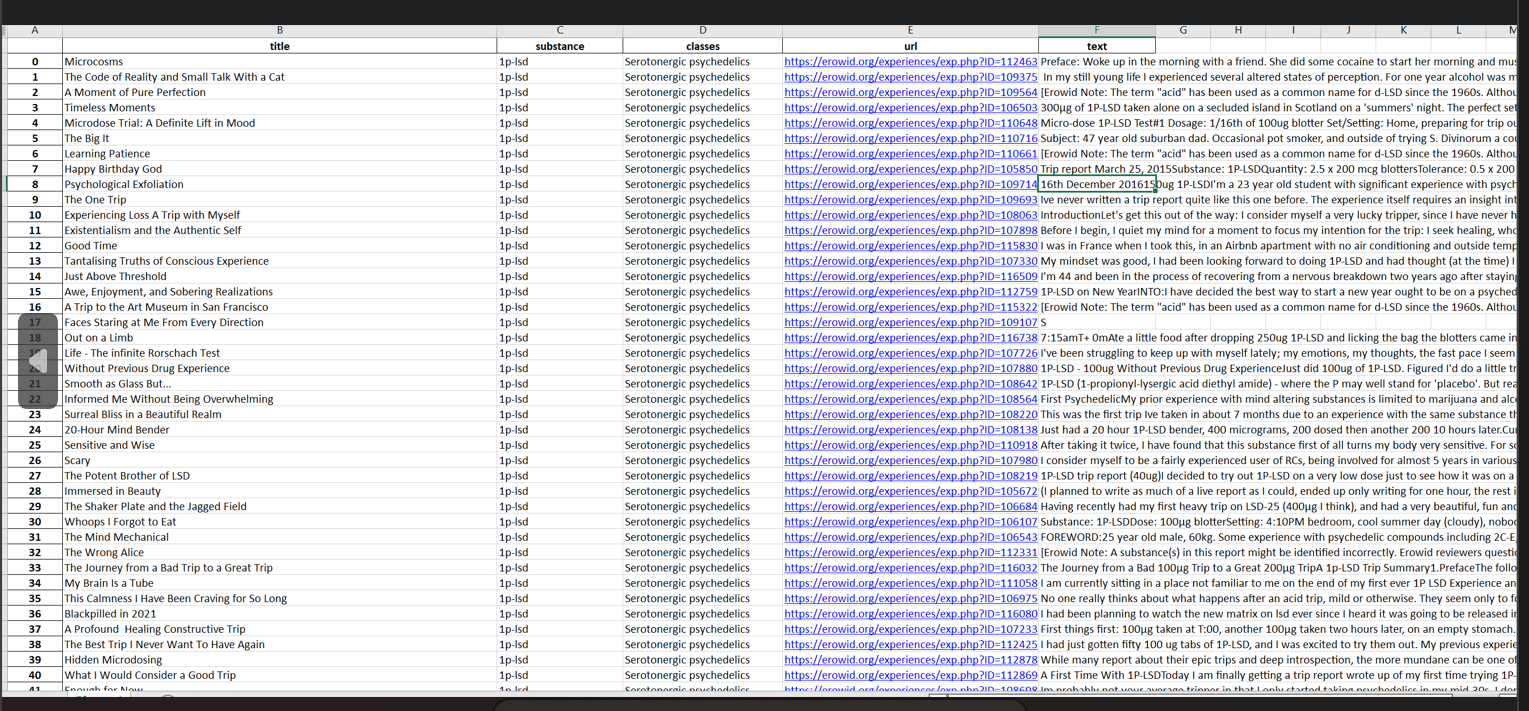

In [ ]:
#save formatted data

df = df.sort_values(by=["substance"])
df.reset_index(drop=True, inplace=True)

df.to_excel("complete_processed_data.xlsx")